# Статистика (ДЗ)

## Homework 1

### Task 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk

plt.style.use("cyberpunk")

,Name,Market Capitalization (bln $),Type
0,Bitcoin,2080.248015,PoW
1,Ethereum,407.431600,PoS
2,XRP,180.859102,FBA
3,Tether,138.154500,PoS
4,Solana,131.836536,PoS
5,BNB,100.259862,PoS
6,Dogecoin,57.357502,PoW
7,USDC,47.848206,PoS
8,Cardano,37.591807,PoS
9,TRON,20.758209,DPoS


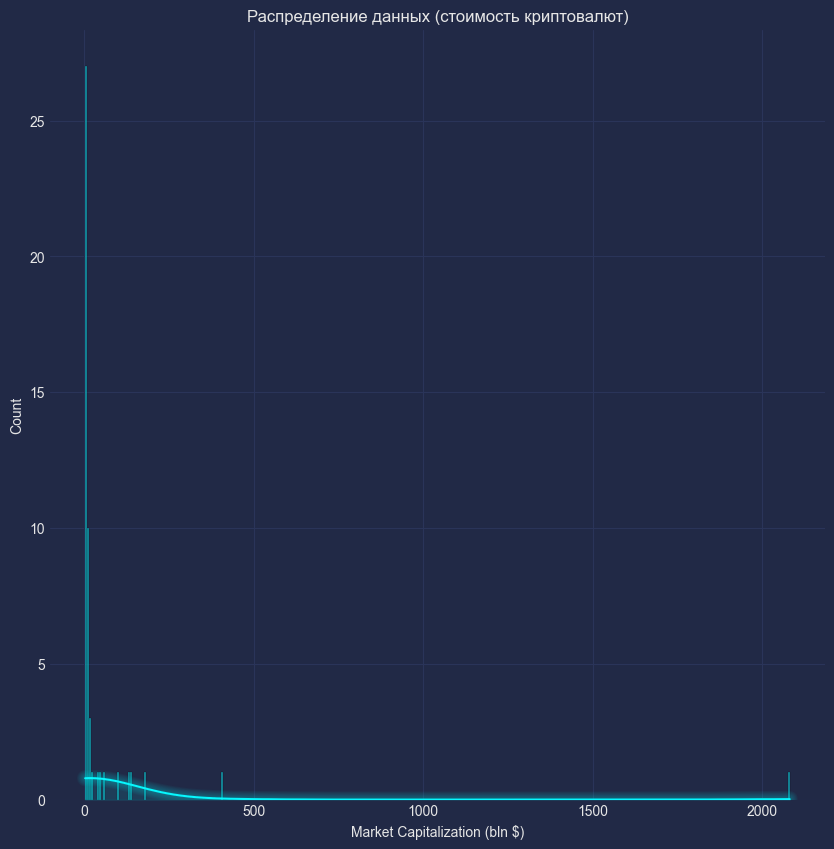

In [3]:
df = pd.read_excel('Hw-1-crypto.xlsx', sheet_name='Main')
df.dropna(subset=['Name', 'Market Capitalization (bln $)'], inplace = True)
df.drop(columns = '#', inplace = True)
df.index = np.arange(0, len(df))

display(df)



plt.figure(figsize=(10, 10))
sns.histplot(df['Market Capitalization (bln $)'], kde = True)
plt.title('Распределение данных (стоимость криптовалют)')
mplcyberpunk.add_glow_effects()

#plt.xlim(-10, 200)

Как видно, у нас здесь прослеживаются явные выбросы, основная же часть данных состредоточена в пределах от 0 до 100

Среднее значение массива данных:  69.61919829444
Медиана в массиве данных:  7.3229647445
Стандартное отклонение в массиве данных:  294.6298155721478
Интерквартильный размах:  10.69705016675


(-200.0, 2200.0)

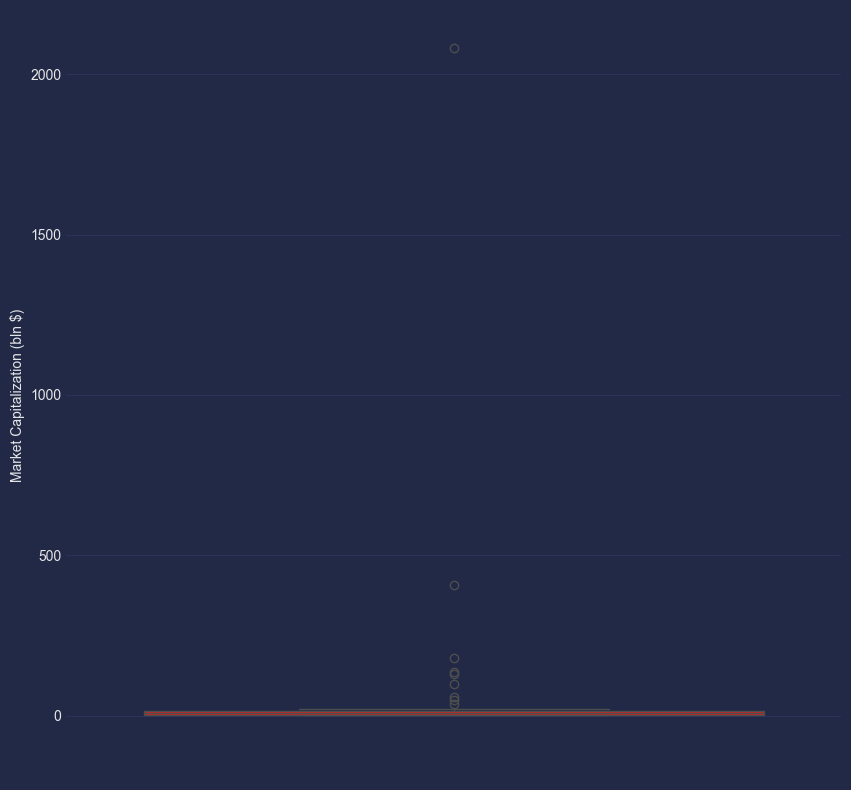

In [4]:
# Статистики

df_mean = np.mean(df['Market Capitalization (bln $)'])
print('Среднее значение массива данных: ', df_mean)


df_median = np.median(df['Market Capitalization (bln $)'])
print('Медиана в массиве данных: ', df_median)

df_std = np.std(df['Market Capitalization (bln $)'])
print('Стандартное отклонение в массиве данных: ', df_std)


df_Q1 = np.percentile(df['Market Capitalization (bln $)'], 25)
df_Q3 = np.percentile(df['Market Capitalization (bln $)'], 75)

IQR = df_Q3 - df_Q1

print('Интерквартильный размах: ', IQR)


plt.figure(figsize = (10, 10))
sns.boxplot(df['Market Capitalization (bln $)'], color='red')
plt.ylim(-200, 2200)

### Task 3

In [5]:
# Очистим валюты, у которых тип неизвестен

df.dropna(subset=['Type'], inplace = True)

display(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Name                           49 non-null     object 
 1   Market Capitalization (bln $)  49 non-null     float64
 2   Type                           49 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


None

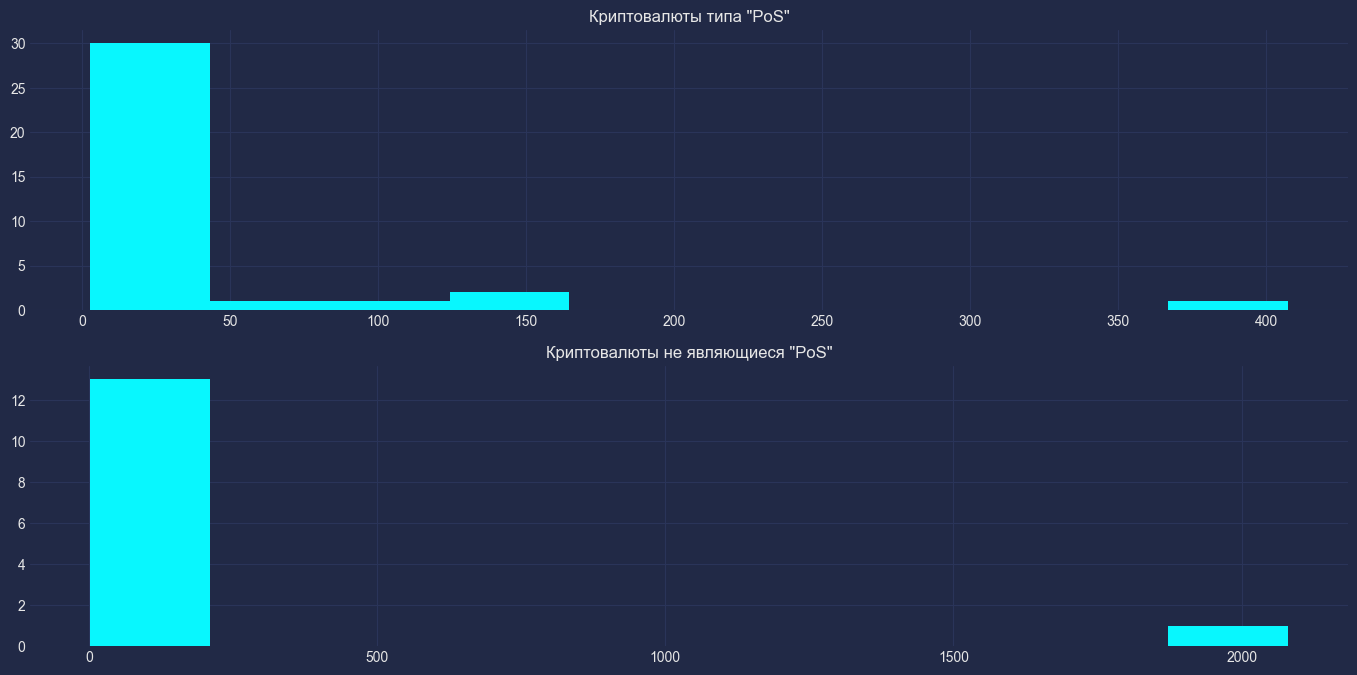

In [6]:
df_pos = df[
    df['Type'] == 'PoS'
]
#display(df_pos)

df_non_pos = df[
    df['Type'] != 'PoS'
]

fig, ax = plt.subplots(2, 1, figsize = (17, 8))
ax[0].hist(df_pos['Market Capitalization (bln $)'])
ax[0].set_title('Криптовалюты типа "PoS"')

ax[1].hist(df_non_pos['Market Capitalization (bln $)'])
ax[1].set_title('Криптовалюты не являющиеся "PoS"')

plt.show()

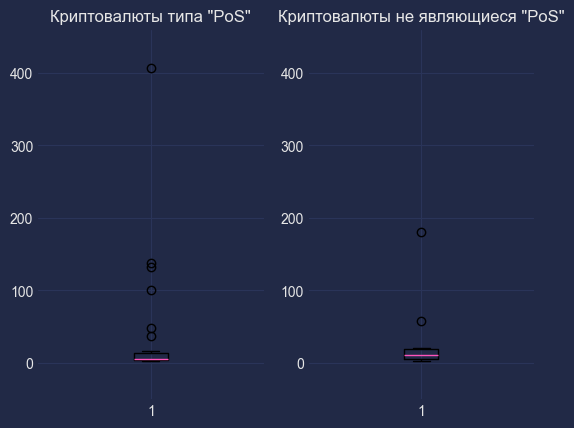

In [7]:
fig, ax = plt.subplots(1, 2)

ax[0].boxplot(df_pos['Market Capitalization (bln $)'])
ax[0].set_title('Криптовалюты типа "PoS"')
ax[0].set_ylim(-50, 460)

ax[1].boxplot(df_non_pos['Market Capitalization (bln $)'])
ax[1].set_title('Криптовалюты не являющиеся "PoS"')
ax[1].set_ylim(-50, 460)

plt.show()

In [8]:
# Так в чем, собственно различие?

print('Количество криптовалют, не являющихся "PoS": ', len(df_non_pos))
print('Количество криптовалют, являющихся "PoS": ', len(df_pos))
print()

print('Средняя ценность криптовалют, не являющихся "PoS": ', df_non_pos['Market Capitalization (bln $)'].mean())
print('Средняя ценность криптовалют, являющихся "PoS": ', df_pos['Market Capitalization (bln $)'].mean())
print()

print('Медиана криптовалют, не являющихся "PoS": ', np.median(df_non_pos['Market Capitalization (bln $)']))
print('Медиана криптовалют, являющихся "PoS": ', np.median(df_pos['Market Capitalization (bln $)']))
print()


print('Дисперсия криптовалют, являющиеся "PoS": ', np.var(df_pos['Market Capitalization (bln $)']))
print('Дисперсия криптовалют, не являющиеся "PoS": ', np.var(df_non_pos['Market Capitalization (bln $)']))
print()

print('Разница между максимальны и минимальным значением (range) у "PoS":', np.max(df_pos['Market Capitalization (bln $)']) - np.min(df_pos['Market Capitalization (bln $)']))
print('Разница между максимальны и минимальным значением (range) у "PoS":', np.max(df_non_pos['Market Capitalization (bln $)']) - np.min(df_non_pos['Market Capitalization (bln $)']))



Количество криптовалют, не являющихся "PoS":  14
Количество криптовалют, являющихся "PoS":  35

Средняя ценность криптовалют, не являющихся "PoS":  172.97109731678566
Средняя ценность криптовалют, являющихся "PoS":  29.937094912228577

Медиана криптовалют, не являющихся "PoS":  11.014775208
Медиана криптовалют, являющихся "PoS":  5.363886138

Дисперсия криптовалют, являющиеся "PoS":  5326.367610889222
Дисперсия криптовалют, не являющиеся "PoS":  281849.09719900164

Разница между максимальны и минимальным значением (range) у "PoS": 404.673557978
Разница между максимальны и минимальным значением (range) у "PoS": 2077.668505511


Лично я могу сделать вывод, что валюты "PoS" более разнообразны из-за размаха и дисперсии, но в целом можно заявить о том, что стоимость PoS намного меньше, в сравнении с другими валютами

### Task 4

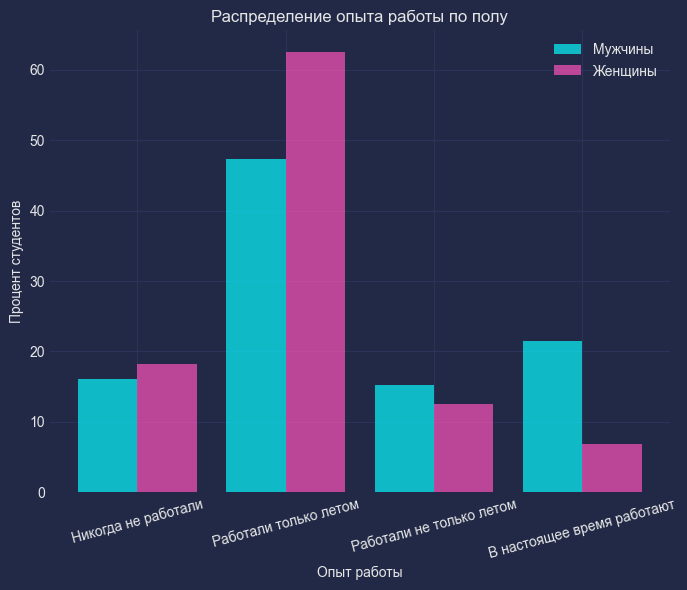

In [9]:
data = np.array([
    [18, 16],  
    [53, 55],  
    [17, 11],  
    [24, 6] 
])

categories = [
    "Никогда не работали",
    "Работали только летом",
    "Работали не только летом",
    "В настоящее время работают"
]

genders = ["Мужчины", "Женщины"]

totals = data.sum(axis=0)  # Общее число мужчин и женщин
relative_data = (data / totals) * 100  # Рассчитываем относительные частоты в %

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.4
x = np.arange(len(categories))

ax.bar(x - bar_width / 2, relative_data[:, 0], width=bar_width, label=genders[0], alpha=0.7)
ax.bar(x + bar_width / 2, relative_data[:, 1], width=bar_width, label=genders[1], alpha=0.7)

ax.set_xlabel("Опыт работы")
ax.set_ylabel("Процент студентов")
ax.set_title("Распределение опыта работы по полу")
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=15)
ax.legend()

plt.show()


Анализ результатов:

* Никогда не работали:
  *  Чуть больше женщин (≈18,2%) никогда не имели работы по сравнению с мужчинами (≈16,1%)

*  Работали только летом: 
      *  Доля женщин намного больше и в основном большинство женщин работало именно летом

* Работали не только летом: 
  * Небольшое преимущество у мужчин (~15,2%) по сравнению с женщинами (~12,5%)

* В настоящее время работают: 
  * Мужчины значительно чаще заняты на данный момент (≈21,4%), чем женщины (≈6,8%)

Вывод: Мужчины чаще работают в настоящее время, а женщины чуть чаще никогда не имели работы. Опыт летней подработки схож у обоих полов